# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Sulthan Farras Razin]
- **Email:** [sulthanrazin@apps.ipb.ac.id]
- **ID Dicoding:** [sulthancode]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Berapa total sepeda terpinjam pada bulan Januari 2010?
- Pertanyaan 2: Pada jam berapa sepeda paling sering dipinjam?
- Pertanyaan 3: Bagaimana rata-rata peminjaman sepeda setiap jam selama hari kerja dibandingkan dengan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [2]:
# install library yang dibutuhkan
!pip install streamlit pandas matplotlib numpy seaborn plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.7 MB/s eta 0:00:00


In [3]:
# Importing necessary libraries
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Data Wrangling

### Gathering Data

In [5]:
# Membaca dataset 'day.csv' dan 'hour.csv'
day = pd.read_csv("day.csv", delimiter=",")
print(day)


     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0      

In [6]:
Hour = pd.read_csv("Hour.csv", delimiter=",")
print(Hour)

       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1              

In [7]:
# Mengelompokkan data 'hour' berdasarkan kolom 'dteday' dan menghitung total 'cnt' (jumlah peminjaman sepeda)
q = Hour.groupby('dteday')['cnt'].sum().reset_index()
q

,dteday,cnt
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600
...,...,...
726,2012-12-27,2114
727,2012-12-28,3095
728,2012-12-29,1341
729,2012-12-30,1796


Insight
1. **Total Penyewaan Sepeda per Hari**: Data diolah untuk menghitung total penyewaan sepeda (`cnt`) setiap hari, membantu melihat tren harian.

2. **Distribusi Waktu Penyewaan**: Dengan mencetak data('day csv'), kita bisa melihat pola penyewaan berdasarkan jam dan tanggal, seperti waktu puncak peminjaman.

### Assessing Data

In [8]:
# Menampilkan informasi umum tentang dataset 'Hour'
Hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
# Menampilkan jumlah entri unik untuk setiap kolom dalam data 'Hour'
print("Jumlah entri unik untuk setiap kolom dalam data Hour:")
Hour.nunique()

Jumlah entri unik untuk setiap kolom dalam data Hour:


,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


In [10]:
# Mengecek data yang hilang (missing values) dalam dataset 'Hour'
Hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [11]:
# Mengecek jumlah duplikasi dalam dataset 'Hour'
Hour.duplicated().sum()

0

In [12]:
# Menampilkan statistik deskriptif dari dataset 'Hour'
Hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
1. **Informasi Struktur Data**: Kodingan di atas memberikan detail tentang struktur dataset "Hour", termasuk tipe data dan jumlah baris pada setiap kolom, yang membantu memahami isi dan komposisi dataset.

2. **Deteksi Missing Values dan Duplikasi**: Mengecek apakah ada nilai yang hilang (missing values) dan duplikasi di dalam dataset, yang penting untuk memastikan kualitas data sebelum analisis lebih lanjut.

3. **Statistik Deskriptif**: Menyediakan ringkasan statistik seperti mean, median, dan standard deviation untuk setiap fitur numerik dalam dataset, memberikan gambaran awal tentang distribusi data.

### Cleaning Data

In [13]:
# Menghitung nilai kuartil pertama (Q1), kuartil ketiga (Q3), dan Interquartile Range (IQR)
Q1 = Hour['cnt'].quantile(0.25)
Q3 = Hour['cnt'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas atas dan batas bawah untuk mendeteksi outlier
maximum = Q3 + (1.5 * IQR)
minimum = Q1 - (1.5 * IQR)

# Mengidentifikasi baris yang merupakan outlier berdasarkan batas atas dan bawah
kondisi_lower_than = Hour['cnt'] < minimum
kondisi_more_than = Hour['cnt'] > maximum

# Menampilkan jumlah outlier
print(kondisi_lower_than.sum() + kondisi_more_than.sum())

505


In [14]:
# Menghapus baris yang mengandung outlier dari dataset
Hour.drop(Hour[kondisi_lower_than].index, inplace=True)
Hour.drop(Hour[kondisi_more_than].index, inplace=True)


In [15]:
# Mengubah kolom 'dteday' menjadi tipe datetime
Hour['dteday'] = pd.to_datetime(Hour['dteday'])

In [16]:
# Menampilkan informasi terbaru setelah transformasi tipe data
Hour.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16874 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     16874 non-null  int64         
 1   dteday      16874 non-null  datetime64[ns]
 2   season      16874 non-null  int64         
 3   yr          16874 non-null  int64         
 4   mnth        16874 non-null  int64         
 5   hr          16874 non-null  int64         
 6   holiday     16874 non-null  int64         
 7   weekday     16874 non-null  int64         
 8   workingday  16874 non-null  int64         
 9   weathersit  16874 non-null  int64         
 10  temp        16874 non-null  float64       
 11  atemp       16874 non-null  float64       
 12  hum         16874 non-null  float64       
 13  windspeed   16874 non-null  float64       
 14  casual      16874 non-null  int64         
 15  registered  16874 non-null  int64         
 16  cnt         16874 non-null 

**Insight:**

1. **Deteksi Outlier**: Menghitung kuartil dan Interquartile Range (IQR) membantu mendeteksi outlier dalam data peminjaman sepeda, yang penting untuk analisis yang akurat.

2. **Pembersihan Data**: Penghapusan outlier dari dataset meningkatkan kualitas data, memungkinkan analisis yang lebih baik dan hasil yang lebih dapat diandalkan.

3. **Transformasi Tipe Data**: Mengubah kolom 'dteday' menjadi tipe datetime memungkinkan pemrosesan waktu yang lebih efektif dalam analisis lanjutan.

## Exploratory Data Analysis (EDA)

### Explore ...
1. Jumlah Penyewaan Sepeda per Bulan (Jan 2011 - Des 2012)
2. Histogram Visualisasi Distribusi Peminjaman Sepeda
(Membandingkan Peminjaman Sepeda berdasarkan Bulan, Jam, Hari dalam Minggu, Suhu, dan Kecepatan Angin, serta Kategori Peminjaman (Hari Kerja vs. Akhir Pekan)
3. Diagram Pie Distribusi Peminjaman Sepeda
(	Menganalisis Jumlah Peminjaman Sepeda berdasarkan Musim, Tahun, Hari Libur, Hari Kerja, dan Situasi Cuaca)

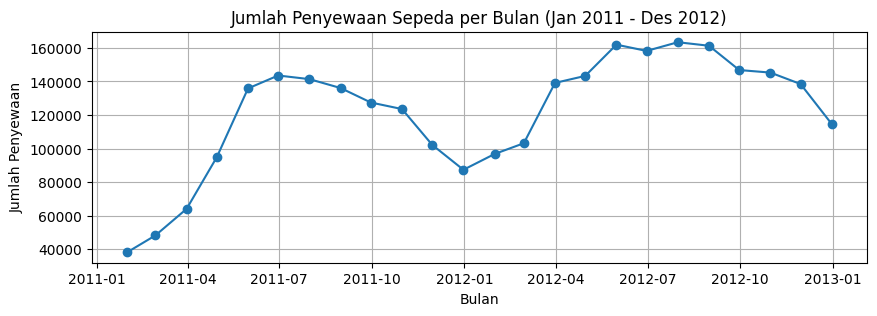

In [17]:
# Convert 'dteday' column to datetime
Hour['dteday'] = pd.to_datetime(Hour['dteday'])

# Group data by month and calculate the sum of 'cnt'
bulanan = Hour.groupby(pd.Grouper(key='dteday', freq='ME')).sum()

# Create a plot to visualize bike rentals per month
plt.figure(figsize=(10, 3))
plt.plot(bulanan.index, bulanan['cnt'], marker='o', linestyle='-')
plt.title('Jumlah Penyewaan Sepeda per Bulan (Jan 2011 - Des 2012)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.grid(True)
plt.show()


In [18]:
# Membuat histogram dengan beberapa kategori
fitur = ['mnth', 'hr', 'weekday', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']
for feature in fitur:
    # Pisahkan data berdasarkan tipe hari (Hari Kerja dan Akhir Pekan)
    fig = px.histogram(Hour,
                       x=feature,
                       y='cnt',
                       color='workingday',
                       title=f'Distribusi {feature} Berdasarkan Hari Kerja vs Akhir Pekan',
                       labels={'cnt': 'Jumlah Peminjaman', feature: feature.capitalize()},
                       color_discrete_sequence=px.colors.qualitative.Set1,
                       barmode='overlay',
                       histnorm='percent'
                       )

    # Menambahkan tata letak yang lebih informatif
    fig.update_layout(
        xaxis_title=feature.capitalize(),
        yaxis_title='Persentase Jumlah Peminjaman',
        title_x=0.5,
        bargap=0.2
    )

    # Update tooltip
    fig.update_traces(marker_line_color='black', marker_line_width=1)

    # Tampilkan chart
    fig.show()

In [20]:


# Define the list of categorical variables
w = ['season', 'yr', 'holiday', 'workingday', 'weathersit']

# Loop through each variable to create a pie chart
for feature in w:
    fig = px.pie(
        Hour,
        names=feature,
        values='cnt',
        title=f'Distribusi Jumlah Penyewaan Berdasarkan {feature.capitalize()}',
        hover_data=['cnt'],
        color_discrete_sequence=px.colors.qualitative.Set2,
        template='plotly_white'
    )

    # Add percentage display in labels
    fig.update_traces(textinfo='percent+label')
    fig.update_layout(title_x=0.5)

    # Keterangan untuk 0 dan 1
    if feature == 'workingday':
        fig.add_annotation(
            text='0: Akhir Pekan<br>1: Hari Kerja',
            xref='paper', yref='paper',
            x=0.5, y=-0.1,
            showarrow=False,
            font=dict(size=12)
        )

    # Show the plot
    fig.show()

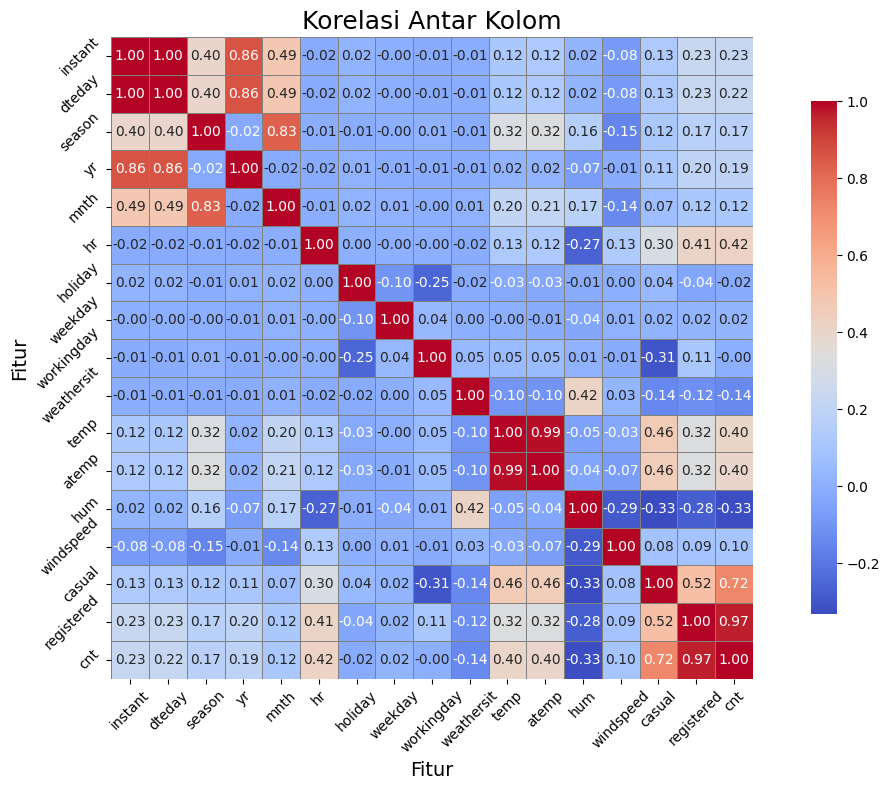

In [21]:
# Menampilkan korelasi antar fitur dalam dataset 'Hour'
matrikskorelasi = Hour.corr()

# Membangun ukuran figure yang lebih besar
plt.figure(figsize=(12, 8))

# Menggunakan heatmap dari seaborn
sns.heatmap(matrikskorelasi,
            annot=True,
            fmt='.2f',
            annot_kws={"size": 10},
            cmap='coolwarm',
            square=True,
            linewidths=0.5,
            linecolor='gray',
            cbar_kws={"shrink": .8})

# Memberikan judul dan label pada sumbu
plt.title('Korelasi Antar Kolom', fontsize=18)
plt.xlabel('Fitur', fontsize=14)
plt.ylabel('Fitur', fontsize=14)

# Memutar label sumbu x agar lebih mudah dibaca
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Menampilkan heatmap
plt.tight_layout()
plt.show()

**Insight:**

1. **Pola Peminjaman**: Histogram menunjukkan bahwa peminjaman sepeda bervariasi berdasarkan bulan, jam, dan suhu, yang dapat membantu mengoptimalkan waktu dan lokasi penyewaan.

2. **Hari Kerja vs. Akhir Pekan**: Perbandingan peminjaman antara hari kerja dan akhir pekan menunjukkan perbedaan jumlah peminjaman, memberikan wawasan untuk perencanaan sumber daya.

3. **Korelasi Antar Fitur**: Heatmap korelasi mengungkapkan hubungan antara fitur, seperti suhu yang mungkin berhubungan positif dengan jumlah peminjaman, membantu dalam strategi pemasaran dan manajemen armada.

## Visualization & Explanatory Analysis

### Pertanyaan 1:  Berapa total terpinjam pada bulan Januari 2010?

\

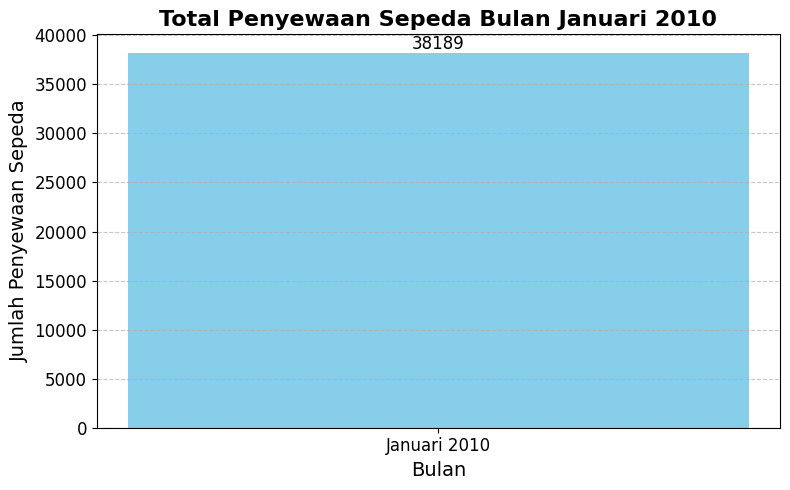

In [22]:
# Menghitung total penyewaan sepeda pada bulan Januari 2010
total_jan_2010 = Hour[(Hour['yr'] == 0) & (Hour['mnth'] == 1)]['cnt'].sum()

# Visualisasi dengan bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar('Januari 2010', total_jan_2010, color='skyblue')

# Menambahkan nilai di atas batang
plt.text(bars[0].get_x() + bars[0].get_width()/2, bars[0].get_height(),
         f'{total_jan_2010}', ha='center', va='bottom', fontsize=12)

# Mengatur tampilan
plt.title('Total Penyewaan Sepeda Bulan Januari 2010', fontsize=16, fontweight='bold')
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Menampilkan chart
plt.tight_layout()
plt.show()

### Pertanyaan 2: Pada jam berapa sepeda paling sering dipinjam?

In [23]:
# Mengelompokkan data berdasarkan jam ('hr') dan menghitung total penyewaan sepeda
jumlahperjam = Hour.groupby('hr')['cnt'].sum().reset_index()

# Menemukan jam dengan peminjaman sepeda paling ramai
ramai_jam = jumlahperjam.loc[jumlahperjam['cnt'].idxmax()]

# Fungsi untuk mengonversi jam dari format 24-jam ke format 12-jam (AM/PM)
def convert_to_ampm(hour):
    if hour == 0:
        return '12 AM'
    elif 1 <= hour < 12:
        return f'{hour} AM'
    elif hour == 12:
        return '12 PM'
    else:
        return f'{hour - 12} PM'

# Mengonversi jam ke format AM/PM
jumlahperjam['hr_am_pm'] = jumlahperjam['hr'].apply(convert_to_ampm)

# Visualisasi dengan bar chart
fig = px.bar(jumlahperjam, x='hr_am_pm', y='cnt', title='Jumlah Peminjaman Sepeda per Jam', labels={'hr_am_pm': 'Jam', 'cnt': 'Jumlah Penyewaan'})
fig.update_layout(xaxis_title='Jam', yaxis_title='Jumlah Peminjaman Sepeda', title_x=0.5)
fig.show()

### Pertanyaan 3: Bagaimana rata-rata peminjaman sepeda setiap jam selama hari kerja dibandingkan dengan akhir pekan?

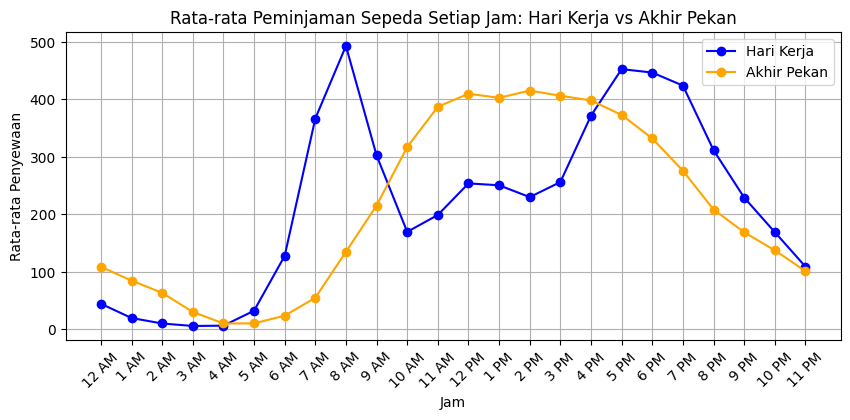

In [24]:
# Memfilter data untuk tahun terakhir (yr == 1)
data = Hour[Hour['yr'] == 1]

# Mengelompokkan data berdasarkan jam ('hr') dan tipe hari ('workingday'), lalu menghitung rata-rata peminjaman
rata_jam = data.groupby(['hr', 'workingday']).mean()['cnt'].reset_index()

# Mengubah data jam menjadi format AM/PM
rata_jam['hr_am_pm'] = rata_jam['hr'].apply(lambda x: f'{x % 12 if x % 12 != 0 else 12} {"AM" if x < 12 else "PM"}')

# Membagi data antara hari kerja dan akhir pekan
hari_kerja = rata_jam[rata_jam['workingday'] == 1]
akhir_pekan = rata_jam[rata_jam['workingday'] == 0]

# Membuat plot
plt.figure(figsize=(10, 4))
plt.plot(hari_kerja['hr_am_pm'], hari_kerja['cnt'], marker='o', label='Hari Kerja', color='blue')
plt.plot(akhir_pekan['hr_am_pm'], akhir_pekan['cnt'], marker='o', label='Akhir Pekan', color='orange')
plt.title('Rata-rata Peminjaman Sepeda Setiap Jam: Hari Kerja vs Akhir Pekan')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

## Conclusion

Berikut adalah 5 poin kesimpulan singkat dengan insight yang berbeda:

1. Jumlah Peminjaman di Januari 2010:
   Total peminjaman sepeda pada bulan Januari 2010 mencapai **38.189**. Angka ini memberikan gambaran aktivitas awal tahun yang signifikan, meskipun sering kali dipengaruhi oleh kondisi cuaca dan suhu yang lebih dingin.

2. Jam Peminjaman Paling Ramai:
   Dari hasil analisis peminjaman per jam, jam 5
   PM (sore hari) adalah waktu yang paling banyak digunakan untuk meminjam sepeda. Ini mengindikasikan bahwa jam pulang kerja menjadi puncak aktivitas peminjaman.

3. Perbandingan Peminjaman di Hari Kerja vs Akhir Pekan:
   Rata-rata peminjaman sepeda per jam di hari kerja lebih tinggi di pagi dan sore hari, terutama saat jam sibuk (7-9 AM dan 5-7 PM), yang menunjukkan penggunaan sepeda untuk perjalanan kerja. Di akhir pekan, distribusi peminjaman lebih merata sepanjang hari.

